In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1

- Write computer codes to compute the coefficients $c_0, c_1,\dots , c_n$ and to evaluate the corresponding interpolation polynomial at an arbitrary point $x$. Test your codes and turn in a run of your test.

In [2]:
def comp_ntcoefs(xn, yn):
    """
    compute the coefficients c_0, c_1, ..., c_n of Newton
    interpolation polynomial
    
    Args:
        xn: nodes
        yn: values at corresponding nodes
    Ret:
        coefficients
    """
    cs = np.copy(yn)
    n = len(xn) - 1
    for k in range(1,n+1):
        for j in range(n,k-1,-1):
            cs[j] = (cs[j]-cs[j-1])/(xn[j]-xn[j-k])
    return cs

def ntinterp(x, xn, cs):
    """
    evaluate the Newton interpolation polynomial
    at an arbitrary point x
    
    Args:
        x: an arbitrary point
        xn: nodes
        cs: coefficients in Newton's form
    Ret:
        approximate value at point x
    """
    n = len(cs)-1
    p = cs[n]
    for j in range(n-1,-1,-1):
        p = cs[j]+(x-xn[j])*p
    return p

Test Code

newton's interpolation coefficients for f(x)=2x [-2.  2.  0.  0.  0.]


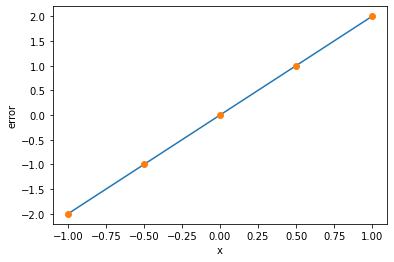

In [3]:
xn = np.array([-1,-1/2,0,1/2,1]) # nodes
yn = 2*xn                       # values
cs = comp_ntcoefs(xn, yn)       # coeffs
print("newton's interpolation coefficients for f(x)=2x", cs)

xbar = -1+np.arange(101)*2/100  # \bar{x}
    
# value at test points
ps = np.zeros_like(xbar)
for i, x in enumerate(xbar):
    ps[i] = ntinterp(x,xn,cs)

# plot the curve of error
plt.figure()
plt.plot(xbar,ps)
plt.plot(xn,yn,'o')
plt.xlabel('x')
plt.ylabel('error')

plt.show()

Our implementation is correct.

- Consider the function $f(x)=xe^{-x^2}$ for $x\in [−1,1]$ and the nodes $x_j=−1+j(2/10)$, $j=0,1,\dots,10$. Use your codes in to evaluate $p_{10}(x)$ at the points $\bar{x}_j = −1 + j(2/100)$, $j = 0, 1,\dots,100$ and plot the error $f(x) − p_{10}(x)$.

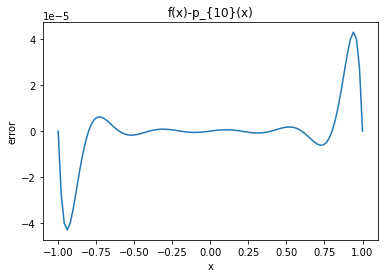

In [4]:
xn = -1+np.arange(11)*2/10  # nodes
yn = xn*np.exp(-xn**2)      # values
cs = comp_ntcoefs(xn, yn)   # coeffs

xbar = -1+np.arange(101)*2/100  # \bar{x}
    
# value at test points
ps = np.zeros_like(xbar)
for i, x in enumerate(xbar):
    ps[i] = ntinterp(x,xn,cs)

# plot the curve of error
plt.figure()
plt.plot(xbar,xbar*np.exp(-xbar**2)-ps)
plt.xlabel('x')
plt.ylabel('error')
plt.title('f(x)-p_{10}(x)')

plt.show()

# Problem 2

The Hermite interpolation polynomial is
$$
P(x)=f(x_0)+f[x_0,x_0](x-x_0)+f[x_0,x_0,x_1](x-x_0)^2+f[x_0,x_0,x_1,x_1](x-x_0)^2(x-x_1)
$$
The coefficients are given by

| $x$    | $f[x]$    | $f[x,y]$     |   $f[x,y,z]$    | $f[x,y,z,w]$            |
| ------- | ---------- | -------------- | ------------------ | ----------------------- |
| $x_0=0$ | $f[x_0]=0$ |                |                    |          |
| $x_0=0$ | $f[x_0]=0$ | $f[x_0,x_0]=0$ |                    |              |
| $x_1=1$ | $f[x_1]=2$ | $f[x_0,x_1]=2$ | $f[x_0,x_0,x_1]=2$ |                 |
| $x_1=1$ | $f[x_1]=2$ | $f[x_1,x_1]=3$ | $f[x_0,x_1,x_1]=1$ | $f[x_0,x_0,x_1,x_1]=-1$ |

Thus
$$
P(x)=2(x-0)^2-(x-0)^2(x-1)
$$



# Problem 3

At each interval, the linear interpolation is given by
$$
p(x)=\frac{2-2}{1-0}(x-0)+2=2, \ x\in[0,1)
$$

$$
p(x)=\frac{1-2}{2-1}(x-1)+2=-x+3, \ x\in[1,2)
$$

$$
p(x)=\frac{9-1}{3-2}(x-2)+1=8x-15, \ x\in[2,3]
$$

Thus a piecewise linear function is
$$
p(x)=\left\{\begin{aligned}
2, \ x\in[0,1) \\
-x+3, \ x\in[1,2) \\
8x-15, \ x\in[2,3]
\end{aligned}\right.
$$

# Problem 4

Write a code to compute a natural spline $S(x)$ which interpolates a collection of given points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$ where $x_0 < x_1 < \dots < x_n$ (do not assume they are equidistributed). Your code should have a triadiagonal solver for the resulting linear system of equations.

In [5]:
# function to compute the coefficients of natural spline S(x)
def comp_nsplcoefs(xn, yn):
    """
    compute the coefficients of the interpolation polynomial 
    of the natural spline S(x).
    
    Args:
        xn: nodes
        yn: values at corresponding nodes  
    Ret:
        coefficients
    """
    dxn = np.diff(xn)  # differencse of nodes
    dyn = np.diff(yn)  # differences of values
    
    dn = np.zeros(len(xn))  # derivatives
    dn[1:-1] = trisolve((dxn[1:-1], 2*(dxn[:-1]+dxn[1:]), dxn[1:-1]),
                        np.diff(6*dyn/dxn))

    cs = np.empty((len(xn), 4))
    cs[:-1,0] = np.diff(dn)/(6*dxn)
    cs[-1,0] = np.nan
    cs[:,1] = dn/2
    cs[:-1,2] = dyn/dxn-dxn*(dn[1:]+2*dn[:-1])/6
    cs[-1,2] = np.nan
    cs[:,3] = yn
    
    return cs

# function to get the evaluation of the natural spline S(x)
def nsplinterp(x, xn, cs):
    """
    evaluate the interpolation polynomial of natural splines
    at an arbitrary point x
    
    Args:
        x: an arbitrary point
        xn: nodes
        cs: coefficients of natural splines S(x)
    Ret:
        value S(x)
    """
    i = np.searchsorted(xn,x,'left')
    if i > 0:
        d = x-xn[i-1]
        p = ((cs[i-1,0]*d+cs[i-1,1])*d+cs[i-1,2])*d+cs[i-1,3]
    else:
        p = cs[0,3]
    return p

# a tridiagonal solver
def trisolve(diags, b):
    """
    a tridiagonal solver for linear equation Ax = b
    
    Args:
        dn: a list which contains three (-1, 0, 1) diagonals
        b: vector
    Ret:
        solution
    """
    dd, dm, du = np.array(diags[0]), np.array(diags[1]), np.array(diags[2])
    
    # solve this tridiagonal linear equation
    for i in range(len(b)-1):
        dd[i] = dd[i]/dm[i]
        dm[i+1] = dm[i+1]-dd[i]*du[i]
    x = np.copy(b)
    for i in range(1,len(b)):
        x[i] = x[i]-dd[i-1]*x[i-1]
    x[len(b)-1] = x[len(b)-1]/dm[len(b)-1]
    for i in range(len(b)-2,-1,-1):
        x[i] = (x[i]-du[i]*x[i+1])/dm[i]
    
    return x

# Problem 5

Use the values in Table 1 to construct a smooth parametric representation of a curve passing through the points $(x_j, y_j)$, $j = 0, 1, \dots ,8$ by finding the two natural cubic splines interpolating and $(t_j, y_j)$,$j = 0, 1,\dots, 8$, respectively. Tabulate the coefficients of the splines and plot the resulting (parametric) curve.

     $t$   $x$   $y$     $a_x$     $b_x$     $c_x$  $d_x$     $a_y$     $b_y$  \
0  0.000  1.50  0.75  0.010537  0.000000 -0.974898   1.50  0.276944  0.000000   
1  0.618  0.90  0.90  0.102103  0.019535 -0.962825   0.90 -3.001012  0.513454   
2  0.935  0.60  1.00  0.987167  0.116635 -0.919659   0.60  2.430450 -2.340509   
3  1.255  0.35  0.80 -1.773549  1.064316 -0.541755   0.35 -0.273187 -0.007277   
4  1.636  0.20  0.45  5.394568 -0.962851 -0.503097   0.20  2.173896 -0.319530   
5  1.905  0.10  0.20 -3.393333  3.390566  0.149959   0.10 -0.784397  1.434804   
6  2.317  0.50  0.10  0.670643 -0.803594  1.215791   0.50 -0.474226  0.465289   
7  2.827  1.00  0.20 -0.147442  0.222490  0.919428   1.00  0.172483 -0.260277   
8  3.330  1.50  0.25       NaN  0.000000       NaN   1.50       NaN  0.000000   

      $c_y$  $d_y$  
0  0.136947   0.75  
1  0.454261   0.90  
2 -0.124915   1.00  
3 -0.876207   0.80  
4 -1.000720   0.45  
5 -0.700711   0.20  
6  0.082127   0.10  
7  0.186683   0.20  


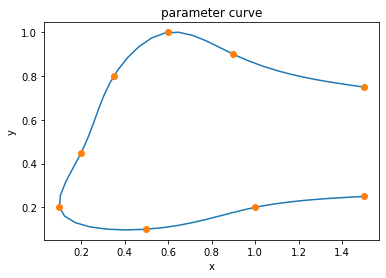

In [6]:
# load data
data = np.array([
[0, 1.5, 0.75],
[0.618, 0.90, 0.90],
[0.935, 0.60, 1.00],
[1.255, 0.35, 0.80],
[1.636, 0.20, 0.45],
[1.905, 0.10, 0.20],
[2.317, 0.50, 0.10],
[2.827, 1.00, 0.20],
[3.330, 1.50, 0.25]
])

# compute coefficients of S_x(t)
cs_x = comp_nsplcoefs(data[:,0], data[:,1])

# compute coefficients of S_y(t)
cs_y = comp_nsplcoefs(data[:,0], data[:,2])

# tabulate
print(pd.DataFrame(np.hstack((data,cs_x,cs_y)),
       columns=['$t$','$x$','$y$','$a_x$','$b_x$','$c_x$',
                '$d_x$','$a_y$','$b_y$','$c_y$','$d_y$']))

# plot the resulting (parametric) curve
tbar = np.linspace(data[0,0],data[-1,0])
ps_x = np.zeros_like(tbar)
ps_y = np.zeros_like(tbar)
for i, t in enumerate(tbar):
    ps_x[i] = nsplinterp(t,data[:,0],cs_x)
    ps_y[i] = nsplinterp(t,data[:,0],cs_y)

# figure
plt.figure()
plt.plot(ps_x,ps_y)
plt.plot(data[:,1],data[:,2],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('parameter curve')

plt.show()